# Sprint3課題 機械学習スクラッチ線形回帰

In [155]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

テスト用にHosePriceのデータを準備

In [156]:
df_train_default = pd.read_csv("train.csv")

In [157]:
df_train_default .head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
df_train = df_train_default[['GrLivArea', 'YearBuilt', 'SalePrice']]

# 説明変数を定義
dfX = df_train[['GrLivArea', 'YearBuilt']]

# 目的変数を定義
dfy = df_train[['SalePrice']]

In [159]:
df_train.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [160]:
# testデータ、trainデータを分ける
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size=0.25, random_state=100 )

In [161]:
arX_train = np.array(dfX_train)
ary_train = np.array(dfy_train)
arX_test = np.array(dfX_test)
ary_test = np.array(dfy_test)

## 【問題1】線形回帰のクラスを作成する

線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。
以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [162]:
# 線形回帰classを実装

class ScratchLinearRegression():


    def __init__(self, num_iter=100, lr=0.000000001, bias=None, verbose=True):
 
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose

        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)        

        
# 学習

#     def fit(self, arX_train, ary_train, arX_test=None, ary_test=None):
    def fit(self, arX_train, ary_train, arX_test, ary_test):

        #パラメータ（＝weightの初期値）の配列を作る
        #self.weight = np.empty(arX_train.shape[1] + 1)
        self.weight = np.random.rand(arX_train.shape[1] + 1 )
        
        #biasを含めた特徴量の配列を作る
        arX_train_bias = np.insert(arX_train, 2, 1, axis=1)
        
        if (arX_test is not None) and (ary_test is not None):
            arX_test = np.insert(arX_test, -1, 1, axis=1)
        
        for i in range(self.iter):
            
            #最急降下法を実行
            self._gradient_descent(arX_train_bias, ary_train)      
            
            
            #学習データに対する損失を記録
            self.loss[i] = self._compute_cost(arX_train_bias, ary_train)
                        
            #検証用データに対する損失を記録
            if (arX_test is not None) and (ary_test is not None):
                self.val_loss[i] = self._compute_cost(arX_test, ary_test)
            

            #verboseをTrueにした際は学習過程を出力   
            if self.verbose:
                print("学習データの損失:" + str(self.loss[i]))
                print("検証用データの損失:" + str(self.val_loss[i]))
                print("coef:" + str(self.weight))
    
    
# 仮定関数を定義する関数
    
    def _linear_hypothesis(self,arX_train_bias):
        return np.dot(self.weight, arX_train_bias.T)    


# MSEを計算する関数を呼び出す

    def _compute_cost(self, arX_train_bias, ary_train):             
        return self.MSE(self._linear_hypothesis(arX_train_bias), ary_train)

    
# 最急降下法

    def _gradient_descent(self, arX_train_bias, ary_train):
        grad = np.mean((self._linear_hypothesis(arX_train_bias)[:, np.newaxis] - ary_train) * arX_train_bias, axis = 0)
        self.weight = self.weight - self.lr * grad


# 推定

    def predict(self, arX_test):
        arX_test_bias = np.insert(arX_test, -1, 1, axis=1)
        return self._linear_hypothesis(arX_test_bias)
        
    
# MSEを導く関数 
    
    def MSE(self, ary_pred, ary_train):
        mse = np.mean((ary_pred - ary_train)**2 / 2)
        return mse
    
    
#グラフをプロットする関数を作る

    def drow(self):
        fig = plt.figure(figsize=(10, 8))
        plt.title("Learning Records")
        plt.xlabel("Number of Iterrations")
        plt.ylabel("Loss")
        plt.plot(self.loss)
        plt.plot(self.val_loss)    
        plt.show()

In [163]:
slr = ScratchLinearRegression()

In [164]:
slr.fit(arX_train, ary_train, arX_test, ary_test)

学習データの損失:18843175270.467873
検証用データの損失:19706373676.086445
coef:[0.46098918 1.23619149 0.08842798]
学習データの損失:18640535762.313297
検証用データの損失:19625180049.645096
coef:[0.75952739 1.58731284 0.08860548]
学習データの損失:18440500038.07779
検証用データの損失:19544706632.704914
coef:[1.05624037 1.93617483 0.08878184]
学習データの損失:18243035022.512917
検証用データの損失:19464946202.739937
coef:[1.3511396  2.2827917  0.08895705]
学習データの損失:18048108058.282856
検証用データの損失:19385891616.228954
coef:[1.64423652 2.62717763 0.08913113]
学習データの損失:17855686900.69801
検証用データの損失:19307535807.738464
coef:[1.93554248 2.96934667 0.08930409]
学習データの損失:17665739712.514767
検証用データの損失:19229871789.016693
coef:[2.22506876 3.30931283 0.08947593]
学習データの損失:17478235058.80082
検証用データの損失:19152892648.098526
coef:[2.51282656 3.64708998 0.08964667]
学習データの損失:17293141901.86491
検証用データの損失:19076591548.421207
coef:[2.79882704 3.98269194 0.0898163 ]
学習データの損失:17110429596.250637
検証用データの損失:19000961727.950645
coef:[3.08308125 4.31613244 0.08998483]
学習データの損失:16930067883.793142
検証用データ

In [165]:
y_pred = slr.predict(arX_test)
y_pred

array([19858.87221179, 39312.4370941 , 28700.24885871, 41062.25066408,
       25630.92391691, 38401.92563157, 40948.13246091, 50601.93063656,
       19016.5274008 , 34833.32045246, 35517.92824804, 33833.13720261,
       42169.85816929, 33696.39820571, 20948.22013169, 26133.75397502,
       30882.08882551, 27442.92015478, 25220.19980894, 19857.65513037,
       41666.92668772, 20540.03161001, 39490.1578935 , 31625.93800889,
       37948.90121624, 20948.52440204,  7813.56151865, 21832.15528588,
       31177.98476614, 25718.87150554, 29900.67227823, 33313.67033441,
       42606.75289179, 19967.61497202, 20267.97354453, 19425.73015699,
       20948.62582549, 29898.94807955, 45235.22759647, 25038.62491838,
       43902.42638847, 32859.32741421, 54115.96327066, 30146.86399953,
       26697.75246653, 22215.79596824, 63486.23916678, 24222.45072193,
       25201.02741257, 15493.0623857 , 47330.74274986, 17901.61740707,
       73439.78737424, 47238.028259  , 30223.44879756, 20536.88748301,
      

## 【問題2】学習曲線のプロット

まず、学習曲線を表示する関数を作成してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。
学習曲線をプロットし、スクラッチ実装が正しく動いているかを検証しましょう。

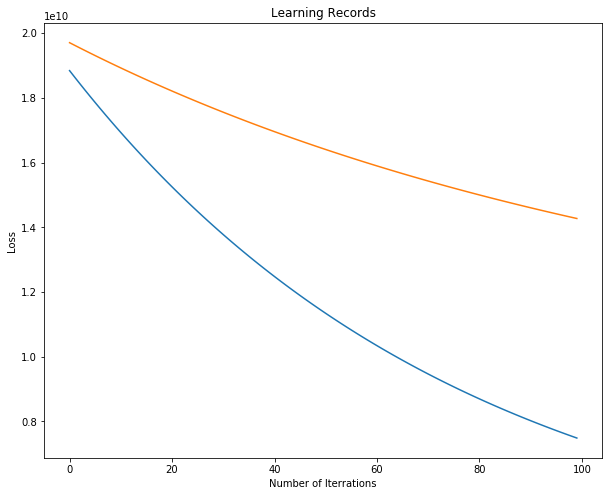

In [166]:
#グラフをプロットする関数を作る
slr.drow()

## 【問題7】スクラッチで学べることは何か

最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か

In [ ]:
・ライブラリが裏で行なっている計算を理解することができた
・ライブラリをその既定の内容に縛られることなく、分析したい方法に合わせて柔軟にチューニングして使うことができるようになる
・数式の実装を経験できたことは、論文などに掲載されているまだライブラリ化されていない手法をプログラムに取り入れる技術に繋がっていくと思う